# Capital Bike Sharing 

In this file, we explore data from the UCI repository, the Capital Bike Sharing dataset, to build a model for rental prediction.

## Frame The Problem 

Suppose we work for a newer bike rental company and our boss wants us to determine from data how many bikes will be rented. He doesn't want us to predict the future and instead wants us to recreate past bike rental counts the given data.  

We can think of a few reasons why this is important:
1. If we know bikes are not going to be used for long durations, we can pull them from circulation and prevent environmental harm. 
2. If we know how many bikes will be used, we can relocate bikes to serve high-demand areas. 

Overall, the main driver is profits. The more people we serve, while reducing expenditures, the more we make. 

We can see from the exploration below that it is numerical data. Thus, this is a Supervised Learning, regression task. We know this as we will predict the total number of bikes used in a day. 

Knowing the model type makes picking an error measurement easy. For most regression problems, we use Root Mean Square Error(RMSE).

In [1]:
#We need to load the data. 
#It is best to automate this process
import os
import tarfile
import urllib
from zipfile import ZipFile
import pandas as pd

#Where we download the data from
DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/"
#Puts hosuing in the datasets folder
BIKE_PATH = os.path.join("datasets", "bikesharing")
BIKE_URL = DOWNLOAD_ROOT + "Bike-Sharing-Dataset.zip"

#Fetches the data, creates a location for it in this current working directory, and extracts the zip file. 
def fetch_data(url=BIKE_URL, path=BIKE_PATH):
    #Makes a new directory. 
    os.makedirs(path, exist_ok=True)
    zip_path = os.path.join(path, "bike.zip")
    urllib.request.urlretrieve(url, zip_path)
    f = ZipFile(zip_path, mode = 'r')
    f.extractall(path=path)
    f.close()

    #Goes down the path and loads the data as a pandas dataframe. 
def load_data(path=BIKE_PATH):
    csv_path = os.path.join(path, "day.csv")
    return pd.read_csv(csv_path)


In [2]:
fetch_data()

In [3]:
bikes = load_data()
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dates in data indicate that we could use time series analysis. Despite this, we will use linear regression in this instance. 

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There are 731 instances in this dataset and none of them appear to have missing entries. 

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


It appears that numerical variables temp, atemp, hum, and windspeed, are not normalized. That is, have a mean of zero and a standard deviation of one. Linear models want the intercept of a numerical value to be set to zero and the data to be normalized. It normalized the data by subtracting the mean of a feature and dividing by the L2 norm. 


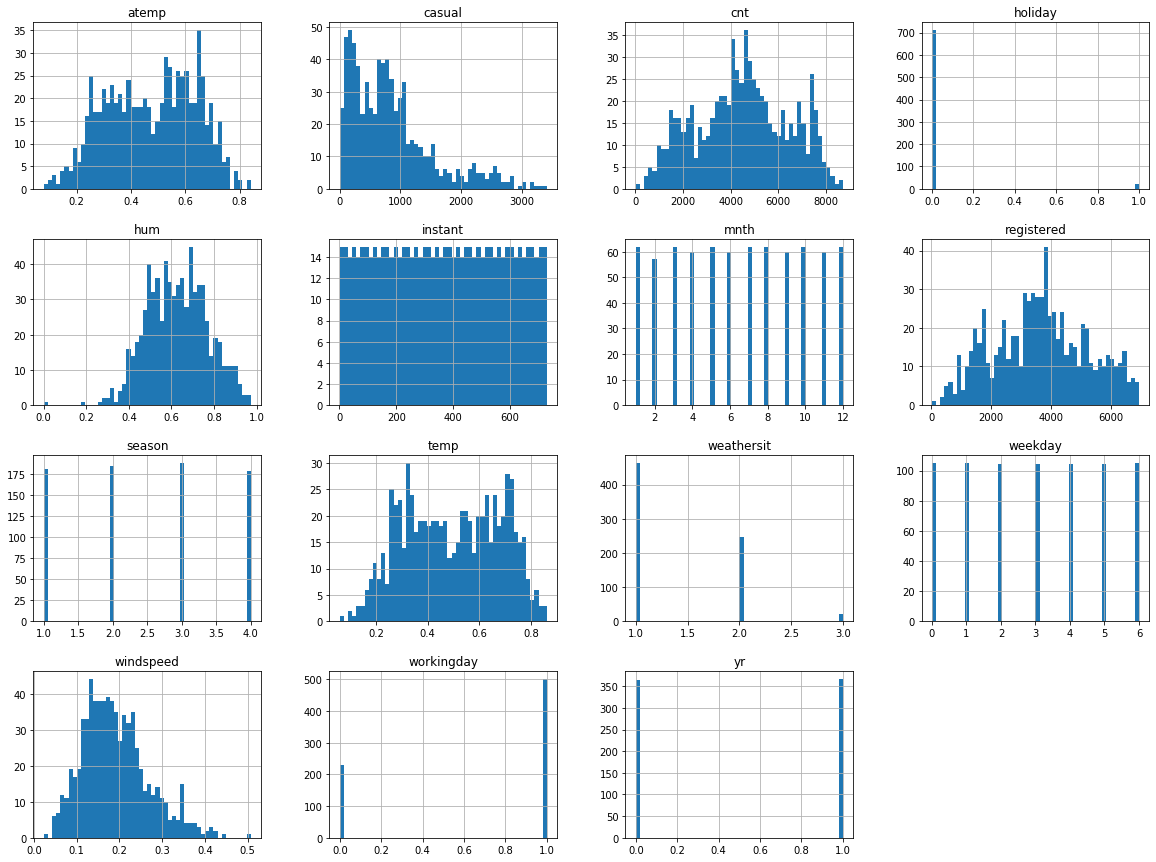

In [6]:
%matplotlib inline
#The hist() method relies on Matplotlib, So before you can plot anything,
#you need to specify which backend Matplotlib should use
import matplotlib.pyplot as plt

bikes.hist(bins=50, figsize=(20,15))
plt.show()

There are many things we can notice from the histograms:

1. atemp and temp look nearly identical(other than their naming conventions).
2. atemp and temp appear to be measured in Celcius despite the typical American Fahrenheit convention. 
3. weathersit only has 3 categories that have been graphed.
4. winspeeds, if in mph are really high. There must be a reason for this. 
5. Despite there being more than two years in all time, yr is a binary category.
6. There are many binary categories: yr, workingday, and holiday.
7. There are also categories with ordinal layouts: mnth, season, weathersit, and weekday. 

The histograms brought up many questions on the data and while we can make assumptions of how the binary/ordinal categories work it is best to use the ReadMe: 

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Splitting the Data


Splitting the data is imperative to validating results, as we need some data to test on. For data that has no categorical predictors, we can usually use Sklearn's train_test_split. If we're going to use this we might occur a **sampling bias** for categorical data. Sampling bias gives a certain subset of the entire data set more predicting power than the rest. To avoid this we would use **stratified sampling** to represent the data equally.  


Stratified sampling requires a subset of a categorical predictor to be larger than another. When observing the histograms it became apparent that weathersit had 3 categories and the readMe disputed that. While we could have used this for stratified sampling, it is better to remove it as one of the categories could have merged into another. 

That leaves season as the only thing we can stratify on but before we stratify on season, we need to see that subgroup proportions. 

In [7]:
bikes["season"].value_counts() / len(bikes)

3    0.257182
2    0.251710
1    0.247606
4    0.243502
Name: season, dtype: float64

The above percentages tell us, the data has no one group dominating, and for a two-year calendar matches our expectations. Knowing the groups, we can randomly sample the data set using train_test_split and see how it performs.

In [8]:
#Randonly picks rows to be part of the testing set 
from sklearn.model_selection import train_test_split

#Set randomState to 42 if you want the same testing set everytime. 
train_set, test_set = train_test_split(bikes, test_size=0.2, random_state=32)

In [9]:
#Ta do! Nearly identical proportions.
train_set["season"].value_counts() / len(train_set)

2    0.263699
3    0.256849
4    0.239726
1    0.239726
Name: season, dtype: float64

train_test_split did well but this method often suffers when the dataset is small. If one season was significantly larger than the other we would most likely see that.

For instances where we have a small amount of data, we should use StratifiedShuffleSplit to ensure each population is properly represented in the training set. 

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bikes, bikes["season"]):
    strat_train_set = bikes.iloc[train_index]
    strat_test_set = bikes.iloc[test_index]

In [11]:
#Almost identical!
strat_train_set["season"].value_counts() / len(strat_train_set)

3    0.256849
2    0.251712
1    0.248288
4    0.243151
Name: season, dtype: float64

Another splitting method is to slice the data so that the first .8n days of data is trained on and the last .2n days of data is tested on. This method is normally used with time series and great for testing forecasting values over time. Despite this, we will go with the first as there is not enough data to quantify seasonal changes. 

## Tackling predictors 

The reason we analyze the readme is to understand what our data is, how the data was gathered, and if anything was transformed.

Our dive showed there is a clear relationship between the temp and atemp. In fact, atemp is the **[feeling temprerature](https://en.wikipedia.org/wiki/Heat_index#:~:text=The%20result%20is%20also%20known,C%20(106%20%C2%B0F).)**(or **feels like** temperature), which is the temperature accounting for humidity and wind speed. Since we account for these it might be redundant to model with both of them but we can explore this in-depth later.

Another observation is that temp, atemp, hum, and windspeed have been normalized by dividing by some constant. The ReadMe does not inform us as to why these constants were chosen but we can reverse them. While some ML algorithms perform better with scaled predictors, it is worth undoing the inconsistent scaling and normalizing the data later.

There are many time-tracking features to the dataset and many make sense when the context is predicting the future. The yr feature is not one of them, it tells the machine when we are in the first year of recorded data or the second. When predicting for future years, this will not be used.

Lastly, we can immediately drop a few columns. cnt is the sum of casual and registered; for this project, we will assume our target goal is to predict the total count rather than a subset of users.

Since we will not be using time series so we can remove the date and instance numbering. 

In [12]:
#Before we do anything we should save the dataset
bikes = strat_train_set.copy()

In [13]:
#Since we will have to do this to the testing set and training set it is best to automate this as a function

#Undo dividing by the max 
def non_standard(dataSet):
    dataSet['hum'] = dataSet['hum']*100
    dataSet['temp'] = dataSet['temp']*41
    dataSet['atemp'] = dataSet['atemp']*50
    dataSet['windspeed'] = dataSet['windspeed']*67
   
#Features that have no value to this project
def drop_others(dataset):
    dataset.drop(['instant', 'dteday','casual','registered','yr', 'weathersit'], axis =1, inplace = True)

#We need to center the data so that the mean is zero, and the standard deviation is one. 
def standardize(dataset, targets): 
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    dataset[targets]=  scaler.fit_transform(dataset[targets])
    

In [14]:
bikes = strat_train_set.copy()
non_standard(bikes)
drop_others(bikes)

targets =['temp', 'atemp','hum', 'windspeed']
standardize(bikes, targets)

In [15]:
bikes.describe()

,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,584.000000
mean,2.494863,6.462329,0.029110,2.926370,0.671233,-3.975131e-16,-3.087333e-16,-2.323104e-16,-1.163453e-16,4476.878425
std,1.111290,3.440045,0.168258,2.023801,0.470168,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1954.717557
min,1.000000,1.000000,0.000000,0.000000,0.000000,-2.157863e+00,-2.283094e+00,-4.382619e+00,-2.151212e+00,22.000000
25%,2.000000,3.000000,0.000000,1.000000,0.000000,-8.700059e-01,-8.618836e-01,-7.444367e-01,-7.246643e-01,3104.000000
50%,2.500000,7.000000,0.000000,3.000000,1.000000,3.119260e-03,5.191773e-02,2.069539e-02,-9.775028e-02,4530.000000
75%,3.000000,9.000000,0.000000,5.000000,1.000000,8.739820e-01,8.221840e-01,7.102579e-01,5.678848e-01,5978.500000
max,4.000000,12.000000,1.000000,6.000000,1.000000,1.995928e+00,2.154206e+00,2.401101e+00,4.179777e+00,8714.000000


Looking at the described data we see something odd with atemp, temp,hum, and windspeed. For all of them, the std is 1.000857e+00. Python sometimes keeps decimals that make are so small that they make no difference. This is the case here and can be seen with the means, they all approach zero but are not zero. We can proceed and be find but if anyone knows how to fix this, please email me. 




### weathersit

ML algorithms will assume that two nearby values are more similar than two distant values and while this might be okay when we are comparing ordered categories such as “bad”, “average”, “good”, and “excellent”. It might not work for less distinguishable categories. Ensuring that we don't have to **one-hot encode** seasons we need to revert to the readme documentation. 

+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
It might be biased but in my experinces, I consider good weather with 1, mediocre weather with 2, bad weather with 3, and terrible weather with 4. Rather than change anything we can leave it alone. 

Desipte we removed weathersit due to one of the ordinal values merging with another.  

## Exploring the Data 

After removing variables that have no value to modeling, we can explore them in-depth. 

Since we are looking to model with linear regression, we can observe the standard correlation coefficient (also called Pearson’s r) between every pair of attributes. 
.

In [16]:
corr_matrix = bikes.corr()

While it best to delineate with a diagram when the number of predictors is numerous it is often best to skip a scatter matrix. The scatter matrix describes the correlation table but becomes harder to read as the number of features grows, see below: 

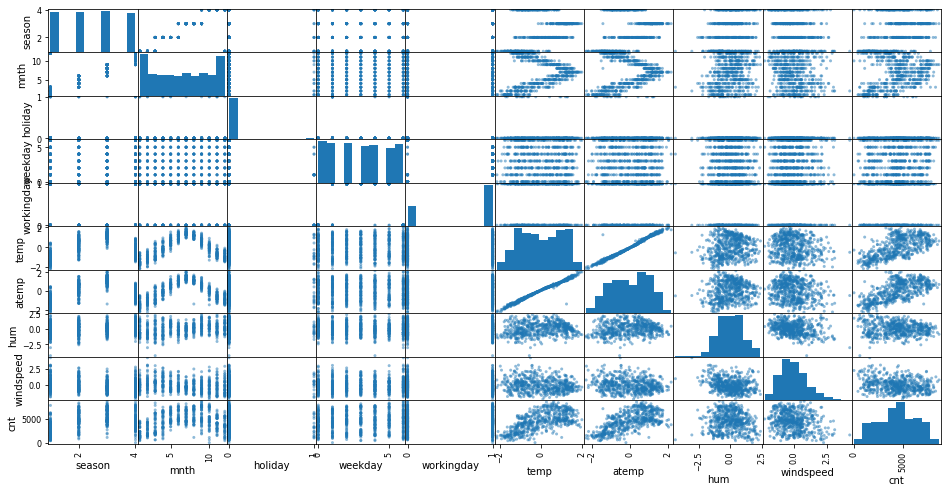

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(bikes, figsize=(16, 8));

We cannot see that some things have a one-to-one correlation but because of the cluttering it can be difficult to determine which ones. If we are having trouble we cab draw the scatter matrix on a subset of the total variables. 

In [18]:
numGroups = 3
splitter =int( len(bikes.columns) /numGroups )
subColumns = [bikes.columns[i*splitter:splitter*(i+1)] for i in range(numGroups)]

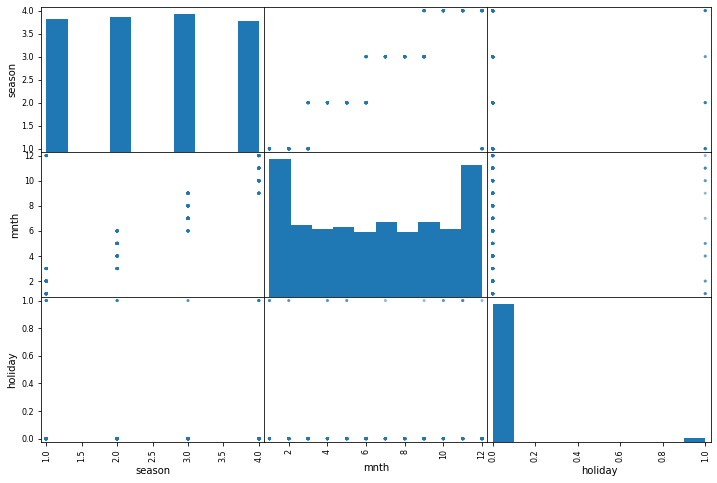

In [19]:
len(bikes.columns)
scatter_matrix(bikes[subColumns[0]], figsize=(12, 8));

The issue with this method is that it does not efficiently describe our data and we would have to try many combinations to see everything the full correlation matrix shows. Instead, we can look at the correlation matrix values. This too can be overwhelming. 

In [20]:
corr_matrix

,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
season,1.000000,0.849083,-0.022132,0.020042,0.006611,0.345131,0.354950,0.226450,-0.237883,0.406214
mnth,0.849083,1.000000,-0.011438,0.032492,-0.020397,0.253680,0.262709,0.246164,-0.209522,0.292580
holiday,-0.022132,-0.011438,1.000000,-0.094439,-0.247415,-0.050090,-0.055456,-0.041071,0.033068,-0.095913
weekday,0.020042,0.032492,-0.094439,1.000000,0.037609,0.002088,-0.007489,-0.046022,0.033764,0.064091
workingday,0.006611,-0.020397,-0.247415,0.037609,1.000000,0.064457,0.063200,0.011296,-0.051634,0.078573
temp,0.345131,0.253680,-0.050090,0.002088,0.064457,1.000000,0.990618,0.139761,-0.149730,0.637256
atemp,0.354950,0.262709,-0.055456,-0.007489,0.063200,0.990618,1.000000,0.152469,-0.176505,0.641780
hum,0.226450,0.246164,-0.041071,-0.046022,0.011296,0.139761,0.152469,1.000000,-0.284001,-0.072021
windspeed,-0.237883,-0.209522,0.033068,0.033764,-0.051634,-0.149730,-0.176505,-0.284001,1.000000,-0.238051
cnt,0.406214,0.292580,-0.095913,0.064091,0.078573,0.637256,0.641780,-0.072021,-0.238051,1.000000


Since there are so many features this too, is difficult to read. Instead, we can use functions to parse the data for the highest correlations as shown below:


In [21]:
#Taked from 
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(bikes, 10))

Top Absolute Correlations
temp    atemp        0.990618
season  mnth         0.849083
atemp   cnt          0.641780
temp    cnt          0.637256
season  cnt          0.406214
        atemp        0.354950
        temp         0.345131
mnth    cnt          0.292580
hum     windspeed    0.284001
mnth    atemp        0.262709
dtype: float64


Getting the 10 highest correlations we can see that our weather variables all have high correlations. The next thing we see is that time indicating variables have high correlations, possibly because they all track time in a linear fashion. Lastly, we see things that highly impact our count.

A high correlation could indicate that two variables are the same but it never implies this. Correlation does not imply causation or equality. Instead of picking our favorite highly correlated variables to remain in the data set, we will save that for other algorithms.  

Since we want to see what has a high correlation with our response we can simply specify that: 

In [22]:
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
atemp         0.641780
temp          0.637256
season        0.406214
mnth          0.292580
workingday    0.078573
weekday       0.064091
hum          -0.072021
holiday      -0.095913
windspeed    -0.238051
Name: cnt, dtype: float64

**Tip**: It is important to note that the correlation coefficient only measures linear correlations. It may completely miss out on nonlinear relationships.

Positive numbers indicate that the count and that variable go up with one another. For example, if the temperature goes up 0.637256 we should expect the count to go up by one. Similarly, a negative number indicates that the count will go down with that variable. For instance, if wind speed increases then the count decreases. 

One thing we have not checked for is missing values. When working with data some entries might be missing, when this happens we handle them, often one of the 3 below options: 

- Get rid of the corresponding rows.

- Get rid of the whole attribute.

- Set the values to some value (zero, the mean, the median, etc.).

There are many ways to identify nulls, we could have looked at bikes.info() to determine if any attributes had missing values or we could use various methods:

In [23]:
bikes.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

If anything was missing a value we would see how many as an integer value. Our table is filled with 0s indicated no missing values.



# Feature Selection

The data set contains almost identical features and it is not ideal to overfit the model. To avoid this we must select features that will stay in for modeling. 

Many feature selecting algorithms select optimal features and there is no one-size-fits-all approach when picking one. For regression tasks, I will use SelectKBest, which uses univariate statistics in selection.   

In [52]:
#We drop cnt so it is not included in modeling
bikes = strat_train_set.drop("cnt", axis=1)
# Save the labels or response variable 
bikes_labels = strat_train_set["cnt"].copy()

In [53]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#We just reset the dataframe, we must drop the redudant/useless features
drop_others(bikes)
non_standard(bikes)
standardize(bikes, targets)

#We use score_func to specify how we should score.
#Looking at k best
test = SelectKBest(score_func=f_regression, k=3)
fit = test.fit(bikes.values, bikes_labels.values)
# summarize scores
#Up to two digits past the decimal
set_printoptions(precision=2)
features = fit.transform(bikes.values)
feature_scores = str(fit.scores_)
feature_scores = feature_scores.split()
for score in zip(bikes.columns,feature_scores,fit.get_support() ):
    print(score)

('season', '[115.01', True)
('mnth', '54.48', False)
('holiday', '5.4', False)
('weekday', '2.4', False)
('workingday', '3.62', False)
('temp', '397.96', True)
('atemp', '407.6', True)
('hum', '3.03', False)
('windspeed', '34.96]', False)


Our feature selector tells us that weather is most important. More so, it ranks temp and atemp almost equally. The reason is probably what we explored earlier, atemp is temp accounting for humidity and wind speed. 

To verify that these two are in fact the same thing we can look at the multi-colinearity.
**Multicollinearity** happens when an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

In [54]:
#Statsmodels has module for this
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Create a df to conviently display the info
vif_data = pd.DataFrame()
vif_data["feature"] = bikes.columns
vif_data["VIF"] = [variance_inflation_factor(bikes.values , i)for i in range(len(bikes.columns))]
  
print(vif_data)

      feature        VIF
0      season  19.314191
1        mnth  16.610257
2     holiday   1.068689
3     weekday   2.647990
4  workingday   2.577717
5        temp  55.844717
6       atemp  56.666592
7         hum   1.135465
8   windspeed   1.154024


As we can see temp and atemp have high scores indicating colinearity, since it undermines our model we should get rid of one. Since we have to decide, it is best to research the variables. 

- atemp: Is the "feeling temperature" or "feels like temperature". [We calculate a ‘feels like temperature by taking into account the expected air temperature, relative humidity and the strength of the wind at around 5 feet (the typical height of an human face) combined with our understanding of how heat is lost from the human body during cold and windy days.](https://blog.metoffice.gov.uk/2012/02/15/what-is-feels-like-temperature/#:~:text=We%20calculate%20a%20'feels%20like,during%20cold%20and%20windy%20days.)

- temp: Normalized temperature in Celsius.

Temperature is a variable used in calculating atemp, so are humidity and wind speed. Models can be overfitted, this can happen in many ways but one is using too many features. Choosing fewer features can reduce this. Since we set our K to 3, it might be best to eliminate temp and see if the model chooses another weather variable.

Another score observation is that season and month are both high approach one another. This indicated that having both is likely redundant and we need to remove one. When selecting the K best features we knew that season what higher on the "best feature" scale, and so we will keep it. 

In [55]:
#We just reset the dataframe, we must drop the redudant/useless features
bikes.drop(['temp', 'mnth'], inplace  = True, axis =1)
X = bikes.values
Y = bikes_labels.values

#We use score_func to specify how we should score.
#Looking at k best.
test = SelectKBest(score_func=f_regression, k=3)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=2)
features = fit.transform(X)
feature_scores = str(fit.scores_)
feature_scores = feature_scores.split()
for score in zip(bikes.columns,feature_scores,fit.get_support() ):
    print(score)

('season', '[115.01', True)
('holiday', '5.4', False)
('weekday', '2.4', False)
('workingday', '3.62', False)
('atemp', '407.6', True)
('hum', '3.03', False)
('windspeed', '34.96]', True)


Reviewing the selected features we see that it choose one variable that is used to model atemp, windspeed. Not by much, the next higest features would have been weekday. Since it was close and the variables are so different, it might be worth to try a model with either as the third feature.

# Modeling on all predictors 

Sometimes it might be tempting to predict on all available features. Doing this reveals how the model performs when overfitting. Overfitting occurs when the model's residuals are close together. While we aim to reduce residual error,  an overfitt model puts too much importance on features that might have little or no real value on other data. Below we can see how our model will look without redudant features. 

In [30]:
from sklearn.linear_model import LinearRegression
#fit_intercept: allows us to not start the line at (0,0).
#normalize: It would standardize the data for us. We already did this 
# n_jobs: This will only provide speedup for n_targets > 1 and sufficient large problems
lin_reg = LinearRegression(fit_intercept = True, normalize=False)
lin_reg.fit(bikes, bikes_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
some_data = bikes.iloc[:5]
some_labels = bikes_labels.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [3353.16 4980.24 4256.92 5181.51 5349.59]
Labels: [3425, 4595, 4575, 4891, 5010]


In [32]:
# Let’s measure this regression model’s RMSE on the whole training
from sklearn.metrics import mean_squared_error
import numpy as np
bikes_predictions = lin_reg.predict(bikes)
lin_mse = mean_squared_error(bikes_labels, bikes_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1350.9293821324693

In [33]:
lin_rmse / bikes_labels.mean()

0.3017569953858666

The RMSE is the square root of the variance of the residuals. This tells us the each standard deviation is 1350 bikes away from the real count. Since the empirical rule says 68% percent of the population will be within the first standard deviation(assuming we have standard normal distribution). We know most our data will be 30% off from the actual count. More so we know 95% of our data will be within two standard deviations. 

Now that what our RMSE describes in the model, we can try a model that does not overfit. 

# Modeling on K best features: atemp, season, windspeed.

In [56]:
#First we select our features
features = ['atemp','season','windspeed']
#By defualt fit_intercept is set to true, and normalize is set to false. 
lin_reg = LinearRegression()
#Fit on the k best features
lin_reg.fit(bikes[features], bikes_labels)
#See how our model performs on the features it just predicted on. 
bikes_predictions = lin_reg.predict(bikes[features])
#We need to get the MSE of our residuals 
lin_mse = mean_squared_error(bikes_labels, bikes_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1439.4522532758044

In [57]:
lin_rmse / bikes_labels.mean()

0.32153034251447593

Our model with the best features doesn't do badly in comparison to the overfitted model.  

As we can see the two models both have high RMSEs, while these are not highly accurate models, they are easy to visualize and describe. On the 3 feature model, no overfitting occurs but it could potentially underfit. Underfitting is when a single variable dominates predictions. This could be a reality of our model, we could try using more features to combat this but the selection was small to begin with. 

Instead, we will continue to the testing data

## Evaluate on the test set


In [38]:
#Pull the test set
X_test = strat_test_set.drop("cnt", axis=1)
#Get the labels 
y_test = strat_test_set["cnt"].copy()

#Clean the data
drop_others(X_test)
non_standard(X_test)
standardize(X_test, targets)

#Next we predict on the testing features 
final_predictions = lin_reg.predict(X_test[features])
#Now we see the residuals testing errors
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1450.3740919286133

The RMSE slightly increased when predicting for our testing set but in comparision our model is consistent in prediction.

## Room for improvement

Many tedious tasks could have increased the accuracy model. One-hot encoding on features such as month or weekday could have made a difference when selecting the best features. While hyperparameter tunning could be done, linear regression doesn't have many options for parameter tuning and the default parameters are good enough. Other machine learning algorithms can be used such as a tree regressor, but I wanted to stick to something basic.  

Another thing that can be improved is the model selection. Sklearn is barebones in statistics, my prior project utilized a lot of statistical analysis to pick features via AIC/BIC and there was an emphasis on $R^2$ and p-values. A way to mimic that in python is to use the **statsmodels.regression.linear_model.OLS** module. 

# Summary

Years ago when I first did this project I did not explore variables as well and modeled with weathersit, which is missing an ordinal value. While that model performed better when looking at statistics such as RSS it modled with weathersit, which is missing values used redudant variables such as temperature and windspeed. That exact model used all of the data and did not test against anything and I realied on the statistics between various models. 

Instead, using the steps in [HOML](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) I built a model, went into depth on feature analysis, and produced a model that does not overfit. I hope that doing projects for every chapter will increase my data science skill set! 